In [5]:
import pandas as pd

In [6]:
%pwd

'C:\\Users\\HP\\Harsh'

In [7]:
df = pd.read_csv("Dataset.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
my_list = []

In [9]:
df["Category"][0]

'ham'

In [10]:
len(df)

5572

In [11]:
for i in range(len(df)):
    if df["Category"][i] == "ham":
        my_list.append(df["Message"][i])

In [12]:
my_list

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 "Oh k...i'm watching here:)",
 'Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.',
 'Fine if t

In [13]:
with open("rt-polarity.neg.neg", "w", encoding = 'utf-8') as file:
    # Write your text data to the file
    for i in range(len(my_list)):
        file.write(my_list[i] + "\n")

In [14]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
my_list = []

In [16]:
for i in range(len(df)):
    if df["Category"][i] == "spam":
        my_list.append(df["Message"][i])

In [17]:
my_list

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
 'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
 'XXXMobileMovieClub: To use your credit, click the WAP link in th

In [18]:
with open("rt-polarity.pos", "w", encoding = 'utf-8') as file:
    # Write your text data to the file
    for i in range(len(my_list)):
        file.write(my_list[i] + "\n")

# ..............................................................................................................................

In [19]:
from __future__ import print_function
from gensim.models import word2vec
from os.path import join, exists, split
import os
import numpy as np
import re
import itertools
from collections import Counter

### data_helpers.py

In [20]:
def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

def load_data_and_labels():
    positive_examples = list(open("rt-polarity.pos").readlines())
    positive_examples = [s.strip() for s in positive_examples]
    negative_examples = list(open("rt-polarity.neg.neg").readlines())
    negative_examples = [s.strip() for s in negative_examples]
    x_text = positive_examples + negative_examples
    x_text = [clean_str(sent) for sent in x_text]
    x_text = [s.split(" ") for s in x_text]
    positive_labels = [[0, 1] for _ in positive_examples]
    negative_labels = [[1, 0] for _ in negative_examples]
    y = np.concatenate([positive_labels, negative_labels], 0)
    return [x_text, y]


def pad_sentences(sentences, padding_word="<PAD/>"):
    sequence_length = max(len(x) for x in sentences)
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        new_sentence = sentence + [padding_word] * num_padding
        padded_sentences.append(new_sentence)
    return padded_sentences


def build_vocab(sentences):
    word_counts = Counter(itertools.chain(*sentences))
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    return [vocabulary, vocabulary_inv]


def build_input_data(sentences, labels, vocabulary):
    x = np.array([[vocabulary[word] for word in sentence] for sentence in sentences])
    y = np.array(labels)
    return [x, y]


def load_data2():
    sentences, labels = load_data_and_labels()
    sentences_padded = pad_sentences(sentences)
    vocabulary, vocabulary_inv = build_vocab(sentences_padded)
    x, y = build_input_data(sentences_padded, labels, vocabulary)
    return [x, y, vocabulary, vocabulary_inv]


def batch_iter(data, batch_size, num_epochs):
    data = np.array(data)
    data_size = len(data)
    num_batches_per_epoch = int(len(data) / batch_size) + 1
    for epoch in range(num_epochs):
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_data = data[shuffle_indices]
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, data_size)
            yield shuffled_data[start_index:end_index]

### Word2Vec.py

In [21]:
def train_word2vec(sentence_matrix, vocabulary_inv,
                   num_features=300, min_word_count=1, context=10):
    model_dir = 'models'
    model_name = "{:d}features_{:d}minwords_{:d}context".format(num_features, min_word_count, context)
    model_name = join(model_dir, model_name)
    if exists(model_name):
        embedding_model = word2vec.Word2Vec.load(model_name)
        print('Load existing Word2Vec model \'%s\'' % split(model_name)[-1])
    else:
        num_workers = 2 
        downsampling = 1e-3 
        print('Training Word2Vec model...')
        sentences = [[vocabulary_inv[w] for w in s] for s in sentence_matrix]
        embedding_model = word2vec.Word2Vec(sentences, workers=num_workers,
                                            vector_size=num_features, min_count=min_word_count,
                                            window=context, sample=downsampling)
        embedding_model.init_sims(replace=True)
        if not exists(model_dir):
            os.mkdir(model_dir)
        print('Saving Word2Vec model \'%s\'' % split(model_name)[-1])
        embedding_model.save(model_name)
    embedding_weights = {key: embedding_model.wv[word] if word in embedding_model.wv else
                              np.random.uniform(-0.25, 0.25, embedding_model.vector_size)
                         for key, word in vocabulary_inv.items()}
    return embedding_weights, embedding_model

### Main CNN File

In [22]:
import numpy as np
from keras.layers import concatenate
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.datasets import imdb
from keras.preprocessing import sequence
np.random.seed(0)
model_type = "CNN-non-static" 
data_source = "local_dir" 
embedding_dim = 50
filter_sizes = (3, 8)
num_filters = 10
dropout_prob = (0.5, 0.8)
hidden_dims = 50
batch_size = 64
num_epochs = 5
sequence_length = 400
max_words = 5000
min_word_count = 1
context = 10
def load_data(data_source):
    assert data_source in ["keras_data_set", "local_dir"], "Unknown data source"
    if data_source == "keras_data_set":
        (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words, start_char=None,
                                                              oov_char=None, index_from=None)
        x_train = sequence.pad_sequences(x_train, maxlen=sequence_length, padding="post", truncating="post")
        x_test = sequence.pad_sequences(x_test, maxlen=sequence_length, padding="post", truncating="post")
        vocabulary = imdb.get_word_index()
        vocabulary_inv = dict((v, k) for k, v in vocabulary.items())
        vocabulary_inv[0] = "<PAD/>"
    else:
        x, y, vocabulary, vocabulary_inv_list = load_data2()
        vocabulary_inv = {key: value for key, value in enumerate(vocabulary_inv_list)}
        y = y.argmax(axis=1)
        shuffle_indices = np.random.permutation(np.arange(len(y)))
        x = x[shuffle_indices]
        y = y[shuffle_indices]
        train_len = int(len(x) * 0.9)
        x_train = x[:train_len]
        y_train = y[:train_len]
        x_test = x[train_len:]
        y_test = y[train_len:]
    return x_train, y_train, x_test, y_test, vocabulary_inv
print("Load data...")
x_train, y_train, x_test, y_test, vocabulary_inv = load_data(data_source)
if sequence_length != x_test.shape[1]:
    print("Adjusting sequence length for actual size")
    sequence_length = x_test.shape[1]
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Vocabulary Size: {:d}".format(len(vocabulary_inv)))
print("Model type is", model_type)
if model_type in ["CNN-non-static", "CNN-static"]:
    embedding_weights, embedding_model = train_word2vec(np.vstack((x_train, x_test)), vocabulary_inv, num_features=embedding_dim,
                                       min_word_count=min_word_count, context=context)
    if model_type == "CNN-static":
        x_train = np.stack([np.stack([embedding_weights[word] for word in sentence]) for sentence in x_train])
        x_test = np.stack([np.stack([embedding_weights[word] for word in sentence]) for sentence in x_test])
        print("x_train static shape:", x_train.shape)
        print("x_test static shape:", x_test.shape)
elif model_type == "CNN-rand":
    embedding_weights = None
else:
    raise ValueError("Unknown model type")
if model_type == "CNN-static":
    input_shape = (sequence_length, embedding_dim)
else:
    input_shape = (sequence_length,)
model_input = Input(shape=input_shape)
if model_type == "CNN-static":
    z = model_input
else:
    z = Embedding(len(vocabulary_inv), embedding_dim, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)
conv_blocks = []
for sz in filter_sizes:
    conv = Convolution1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(z)
    conv = MaxPooling1D(pool_size=2)(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)
z = concatenate(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(hidden_dims, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)
model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
if model_type == "CNN-non-static":
    weights = np.array([v for v in embedding_weights.values()])
    print("Initializing embedding layer with word2vec weights, shape", weights.shape)
    embedding_layer = model.get_layer("embedding")
    embedding_layer.set_weights([weights])
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs,
          validation_data=(x_test, y_test), verbose=2)

Load data...
Adjusting sequence length for actual size
x_train shape: (5016, 190)
x_test shape: (558, 190)
Vocabulary Size: 8794
Model type is CNN-non-static
Load existing Word2Vec model '50features_1minwords_10context'
Initializing embedding layer with word2vec weights, shape (8794, 50)
Epoch 1/5
79/79 - 4s - 46ms/step - accuracy: 0.8648 - loss: 0.3429 - val_accuracy: 0.9050 - val_loss: 0.2764
Epoch 2/5
79/79 - 1s - 18ms/step - accuracy: 0.9478 - loss: 0.1549 - val_accuracy: 0.9677 - val_loss: 0.1249
Epoch 3/5
79/79 - 1s - 18ms/step - accuracy: 0.9731 - loss: 0.0983 - val_accuracy: 0.9767 - val_loss: 0.1036
Epoch 4/5
79/79 - 1s - 18ms/step - accuracy: 0.9785 - loss: 0.0756 - val_accuracy: 0.9875 - val_loss: 0.0547
Epoch 5/5
79/79 - 1s - 18ms/step - accuracy: 0.9807 - loss: 0.0668 - val_accuracy: 0.9857 - val_loss: 0.0824


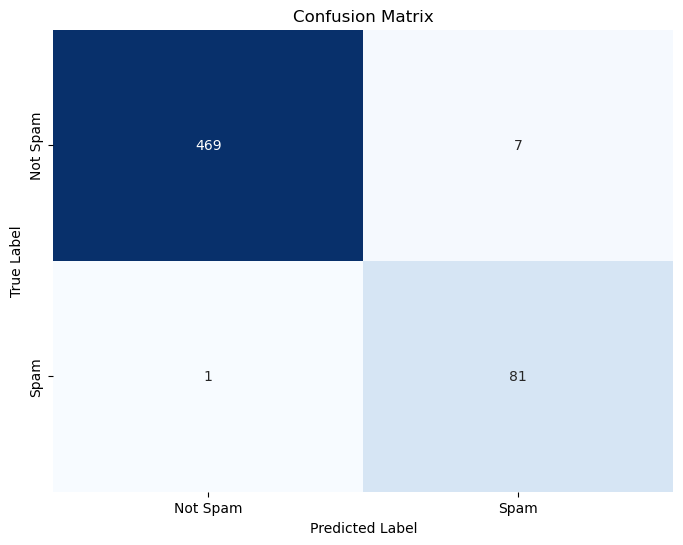

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()